<a href="https://colab.research.google.com/github/kennylids/Data_Science_Projects_Showcase/blob/main/ML_models_on_Iris_Dataset_and_their_performance_comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML models on Iris Dataset and their performance comparisons

Machine learning models like logistic regression, Support Vector Machine, Decision Tree, and K-Nearest Neighbours will be used here on iris dataset.

The Iris dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

## 1. Data Acquisition & Preparation


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

df_iris = pd.DataFrame(iris["data"], columns= iris["feature_names"])
df_iris["species"]=iris["target"]

In [ ]:
#Description of the dataset
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Exploratory Data Analysis


In [ ]:
#check null values
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_iris['species'].value_counts()

# species
# 0 - Iris-Setosa
# 1 - Iris-Versicolour
# 2 - Iris-Virginica

2    50
1    50
0    50
Name: species, dtype: int64

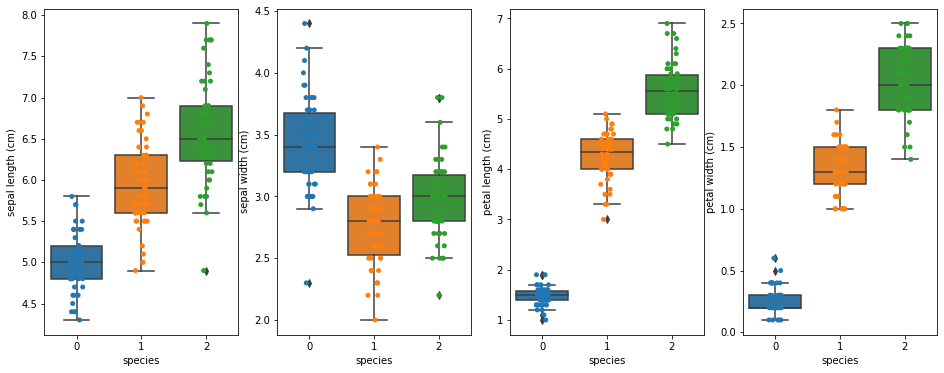

In [ ]:
fig, ax =plt.subplots(1,4, figsize=(16, 6))
sns.boxplot(x="species", y="sepal length (cm)", data=df_iris, ax=ax[0])
sns.stripplot(x="species", y="sepal length (cm)", data=df_iris, jitter=True, edgecolor="gray", ax=ax[0])

sns.boxplot(x="species", y="sepal width (cm)", data=df_iris,ax=ax[1])
sns.stripplot(x="species", y="sepal width (cm)", data=df_iris, jitter=True, edgecolor="gray",ax=ax[1])

sns.boxplot(x="species", y="petal length (cm)", data=df_iris,ax=ax[2])
sns.stripplot(x="species", y="petal length (cm)", data=df_iris, jitter=True, edgecolor="gray",ax=ax[2])

sns.boxplot(x="species", y="petal width (cm)", data=df_iris,ax=ax[3])
sns.stripplot(x="species", y="petal width (cm)", data=df_iris, jitter=True, edgecolor="gray",ax=ax[3])

fig.show()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


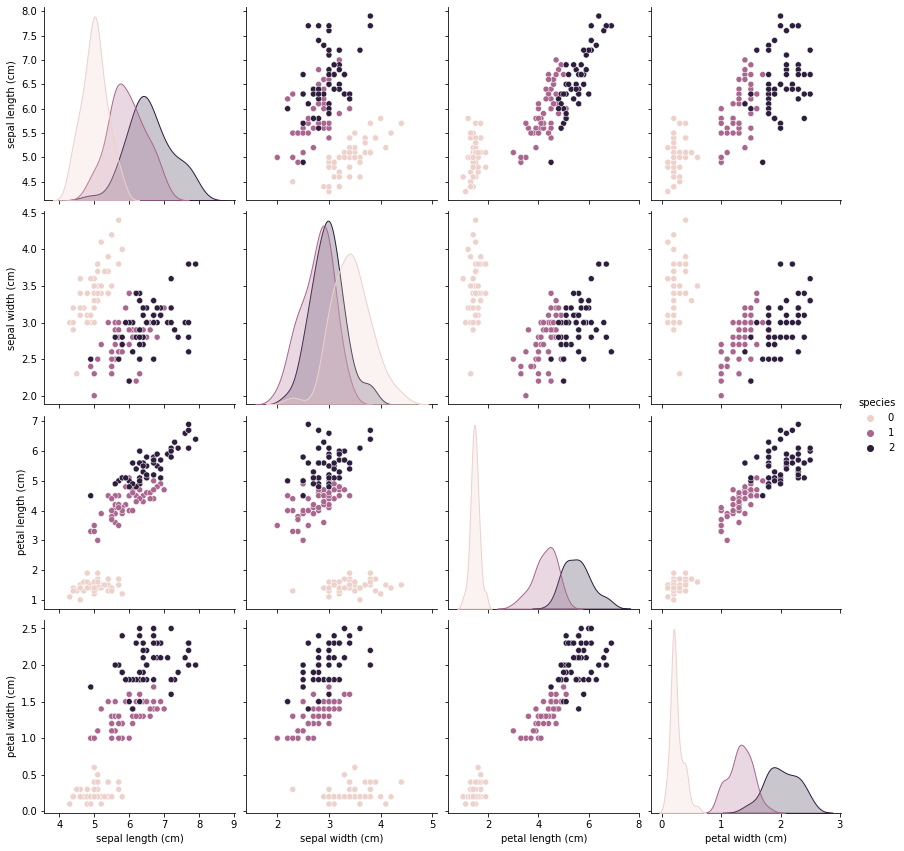

In [ ]:
# #ernel density estimate (KDE)

# sns.FacetGrid(data=df_iris, hue="species", size=6) \
#    .map(sns.kdeplot, "sepal length (cm)") \
#    .add_legend()

# sns.FacetGrid(data=df_iris, hue="species", size=6) \
#    .map(sns.kdeplot, "sepal width (cm)") \
#    .add_legend()

# sns.FacetGrid(data=df_iris, hue="species", size=6) \
#    .map(sns.kdeplot, "petal length (cm)") \
#    .add_legend()

# sns.FacetGrid(data=df_iris, hue="species", size=6) \
#    .map(sns.kdeplot, "petal width (cm)") \
#    .add_legend()


# fig.show()


#KDE with general distributions
sns.pairplot(df_iris, hue="species", size=3, diag_kind="kde")


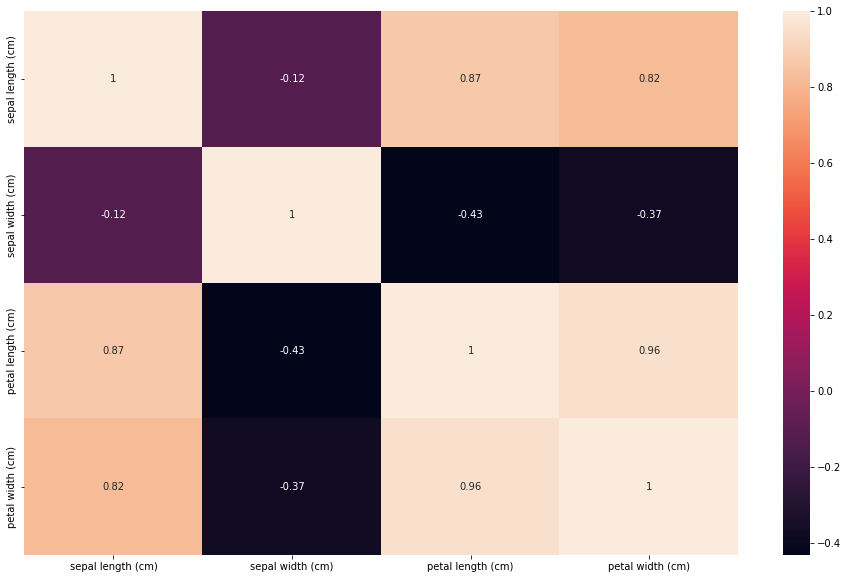

In [ ]:
#correlatioon
#it's best to avoid features that are highly correlated to each other in ML models for efficiency and performance
corr = df_iris.drop('species', 1).corr().round(2)
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True)

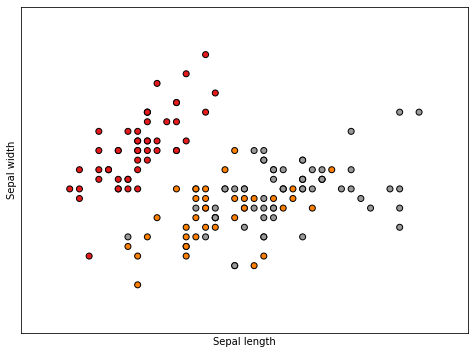

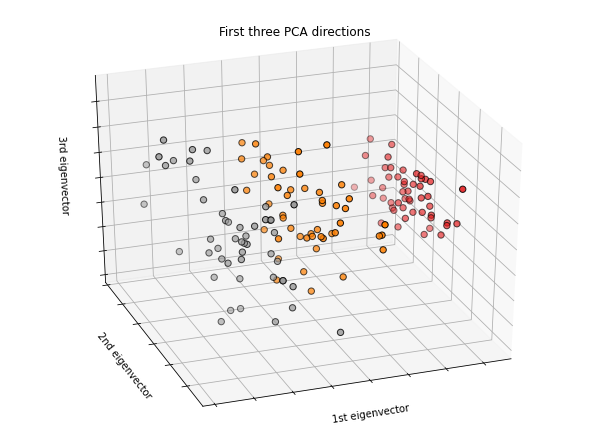

In [ ]:
#These codes are from the sklearn documentations to visualize the data

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## 2. Model Selection

Machine learning models like logistic regression, Support Vector Machine, Decision Tree, and K-Nearest Neighbours will be used here on iris dataset.

Their accuracies will be compared too.


## 3-5. Model Building, Training, Prediction, Evaluation


First, I use all the features to predict the typoes of species with machine learning models.

Then I will petal's and sepal's as separate datasets.

In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[: , :4],df_iris["species"], test_size = 0.4)

In [ ]:
#logistic regression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
prediction_lr=metrics.accuracy_score(model_lr.predict(X_test),y_test)
print('Logistic Regression Accuracy is:',prediction_lr)

Logistic Regression Accuracy is: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#SVM
model_SVM = svm.SVC()
model_SVM.fit(X_train,y_train)
prediction_SVM= metrics.accuracy_score(model_SVM.predict(X_test),y_test)
print('SVM Accuracy is:',prediction_SVM)

SVM Accuracy is: 0.9833333333333333


In [ ]:
#Decision Tree 
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
prediction_DT= metrics.accuracy_score(model_DT.predict(X_test),y_test)
print('Decision Tree Accuracy is:',prediction_DT)

Decision Tree Accuracy is: 0.9666666666666667


In [ ]:
#K-Nearest Neighbours 
#3 is chosen because we have three types oof species
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train,y_train)
prediction_KNN= metrics.accuracy_score(model_KNN.predict(X_test),y_test)
print('KNN Accuracy is:',prediction_KNN)

KNN Accuracy is: 0.9833333333333333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x7fbc1e0e1210>,
 <a list of 10 Text major ticklabel objects>)

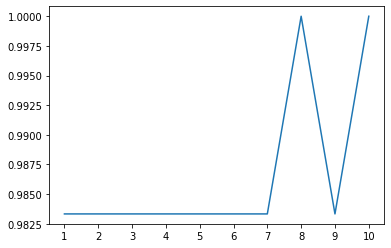

In [ ]:
#KNN models with different values of n
x=list(range(1,11))
a=pd.Series()
for i in x:
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction_KNN= metrics.accuracy_score(model.predict(X_test),y_test)
    a=a.append(pd.Series(prediction_KNN))
plt.plot(x, a)
plt.xticks(x)

### Correlated Features

Looking back at the correlation heat map, we can see that sepal length's correlation to sepal width is smaller than the petal length's correlation to petal width.

In order to avoid multicollinearity, I pick the sepal length and width as selected feature.

However, I will use petal length and petal width as selected features as well, just for comparison. 

Let's see what happens.

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# df_iris2= df_iris['']
df_iris2 = df_iris[['sepal length (cm)', 'sepal width (cm)', 'species']].copy()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_iris2.iloc[: , :2],df_iris["species"], test_size = 0.4)

In [ ]:
print('Sepal length and width as selected features:')
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train,y_train)
prediction_KNN= metrics.accuracy_score(model_KNN.predict(X_test),y_test)
print('KNN Accuracy is:',prediction_KNN)

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
prediction_lr=metrics.accuracy_score(model_lr.predict(X_test),y_test)
print('Logistic Regression Accuracy is:',prediction_lr)

model_SVM = svm.SVC()
model_SVM.fit(X_train,y_train)
prediction_SVM= metrics.accuracy_score(model_SVM.predict(X_test),y_test)
print('SVM Accuracy is:',prediction_SVM)

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
prediction_DT= metrics.accuracy_score(model_DT.predict(X_test),y_test)
print('Decision Tree Accuracy is:',prediction_DT)

Sepal length and width as selected features:
KNN Accuracy is: 0.7333333333333333
Logistic Regression Accuracy is: 0.85
SVM Accuracy is: 0.8666666666666667
Decision Tree Accuracy is: 0.6333333333333333


In [ ]:
print('Petal length and width as selected features:')

df_iris3  = df_iris[['petal length (cm)', 'petal width (cm)', 'species']].copy()
X_train, X_test, y_train, y_test = train_test_split(df_iris3.iloc[: , :2],df_iris["species"], test_size = 0.4)

model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train,y_train)
prediction_KNN= metrics.accuracy_score(model_KNN.predict(X_test),y_test)
print('KNN Accuracy is:',prediction_KNN)

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
prediction_lr=metrics.accuracy_score(model_lr.predict(X_test),y_test)
print('Logistic Regression Accuracy is:',prediction_lr)

model_SVM = svm.SVC()
model_SVM.fit(X_train,y_train)
prediction_SVM= metrics.accuracy_score(model_SVM.predict(X_test),y_test)
print('SVM Accuracy is:',prediction_SVM)

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
prediction_DT= metrics.accuracy_score(model_DT.predict(X_test),y_test)
print('Decision Tree Accuracy is:',prediction_DT)

Petal length and width as selected features:
KNN Accuracy is: 0.9666666666666667
Logistic Regression Accuracy is: 0.9666666666666667
SVM Accuracy is: 0.95
Decision Tree Accuracy is: 0.9666666666666667


This is strange. We are supposed to have better classification accuracy if we use sepal's features other than petal's features, because of the lower correlation.

The general rule of thumb is to use the less correlated features as select features as they usually lead to a better clasification accuracy.

However, if we look back at the description of the dataset (print(iris["DESCR"])), we can actually see that the petal's features have a high class correlation. 

This explains why petal's features lead such good accuracy.



### Side note
It's interesting to see that different ML models give very good accuracy in the iris dataset.

That means... iris is very predictable!